<a href="https://colab.research.google.com/github/MaidinuerSaimi/Python-courses/blob/main/%E2%80%9CWorkshop_2_2_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2.2  (Wrap up quiz M2)

Open the dataset `blood_transfusion.csv` with the following command:

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [4]:
print(blood_transfusion.head())

   Recency  Frequency  Monetary  Time        Class
0        2         50     12500    98      donated
1        0         13      3250    28      donated
2        1         16      4000    35      donated
3        2         20      5000    45      donated
4        1         24      6000    77  not donated


`blood_transfusion` is a `pandas` dataframe. The column `“Class”` contains the target variable.

<div class="alert alert-info">

## Question 1

Select the correct answers from the following proposals.
***
1. The problem to be solved is a regression problem
2. The problem to be solved is a binary classification problem (exactly 2 possible classes)
3. The problem to be solved is a multiclass classification problem (more than 2 possible classes)
4. The proportions of the class counts are imbalanced: some classes have more than twice as many rows than others

Select all answers that apply

Hint: `target.unique()`, and `target.value_counts()` are methods that are helpful to answer to this question.

In [ ]:
# so we found two class in our target ,so it is B （it is donated or not donated
# and we see unbalanced class counts in the data

In [2]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [3]:
target.value_counts()

,count
Class,
not donated,570
donated,178


<div class="alert alert-info">

## Question 2
    
Using a `sklearn.dummy.DummyClassifier` and the strategy `"most_frequent"`, what is the average of the accuracy scores obtained by performing a 10-fold cross-validation?  ~25%, ~50% or ~75%?

Hint: You can check the documentation of `sklearn.model_selection.cross_val_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and `sklearn.model_selection.cross_validate` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

In [5]:
#DummyClassifier(strategy="most_frequent") always predict the the class with highest frequency
#In our case this is (not denoted) and it took570(approxiamately 75% of the total counts), ≈ 75%,and CV =10 is just slicing the data set as 10
#and take the squentially as the test set
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy, data, target, cv=10, scoring="accuracy")
print(scores)
print(scores.mean())


[0.76       0.76       0.76       0.76       0.76       0.76
 0.76       0.76       0.77027027 0.77027027]
0.762054054054054


<div class="alert alert-info">

## Question 3
    
Repeat the previous experiment but compute the balanced accuracy instead of the accuracy score. Pass `scoring="balanced_accuracy"` when calling `cross_validate` or `cross_val_score` functions.  What is the mean score now?    

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(
    dummy, data, target, cv=10, scoring="balanced_accuracy"
)
print(scores)
print(scores.mean())
#for lousy training model like this and we are going to test it balanced accuracy ,who said statistics lack of sense of humor?

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
0.5


We will use a `sklearn.neighbors.KNeighborsClassifier` for the remainder of this workshop.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()  # 默认 n_neighbors=5

# Note：using data and target，is the label and character we labeled before
scores = cross_val_score(knn, data, target, cv=10, scoring="accuracy")
print("Accuracy per fold:", scores)
print("Mean accuracy:", scores.mean())


Accuracy per fold: [0.41333333 0.45333333 0.53333333 0.74666667 0.77333333 0.76
 0.70666667 0.81333333 0.72972973 0.77027027]
Mean accuracy: 0.6699999999999999


<div class="alert alert-info">

## Question 4

Why is it relevant to add a preprocessing step to scale the data using a StandardScaler when working with a KNeighborsClassifier?
***
1. faster to compute the list of neighbors on scaled data

2. k-nearest neighbors is based on computing some distances. Features need to be normalized to contribute approximately equally to the distance computation.

3. This is irrelevant. One could use k-nearest neighbors without normalizing the dataset and get a very similar cross-validation score.




In [ ]:
# I think this second is the correct answer

Create a scikit-learn pipeline (using `sklearn.pipeline.make_pipeline`) where a `StandardScaler` will be used to scale the data followed by a `KNeighborsClassifier`. Use the default hyperparameters.

In [8]:
# we used sklearn.pipeline.make_pipeline to construct theScaler + KNN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# scale first and then KNN
knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)


In [9]:
# train
knn_pipeline.fit(data, target)

# predict
y_pred = knn_pipeline.predict(data)


In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    knn_pipeline,
    data,
    target,
    cv=10,
    scoring="balanced_accuracy"
)
print("Scores per fold:", scores)
print("Mean balanced accuracy:", scores.mean())


Scores per fold: [0.56871345 0.61111111 0.59502924 0.48391813 0.48245614 0.5
 0.57894737 0.75438596 0.50309598 0.52941176]
Mean balanced accuracy: 0.5607069143446852


<div class="alert alert-info">

## Question 5

Inspect the parameters of the created pipeline. What is the value of `K`, the number of neighbors considered when predicting with the k-nearest neighbors.  Is it 1, 3, 5, 8 or 10?

Hint: You can use `model.get_params()` to get the parameters of a scikit-learn estimator.

In [11]:
# it is 5
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())


In [12]:
model.get_params()


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
#kneighborsclassifier__n_neighbors': 5

<div class="alert alert-info">

## Question 6

Set `n_neighbors=1` in the previous model and evaluate it using a 10-fold cross-validation. Use the balanced accuracy as a score. What can you say about this model? Compare the average of the train and test scores to argument your answer.

**
1. The model clearly underfits

2. The model generalizes

3. The model clearly overfits

Hint: compute the average test score and the average train score and compare them. Make sure to pass `return_train_score=True` to the cross_validate function to also compute the train score.

In [ ]:
# The model clearly overfits

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=1)
)

cv_results = cross_validate(
    model,
    data,
    target,
    cv=10,
    scoring="balanced_accuracy",
    return_train_score=True,
)

print("Mean train balanced accuracy:", cv_results["train_score"].mean())
print("Mean test balanced accuracy:", cv_results["test_score"].mean())


Mean train balanced accuracy: 0.8825519300969816
Mean test balanced accuracy: 0.4839869281045751


In [ ]:
# it is basically reciting the answers in the training set

We will now study the effect of the parameter `n_neighbors` on the train and test score using a validation curve. You can use the following parameter range:

```python
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
```

Also, use a 5-fold cross-validation and compute the balanced accuracy score instead of the default accuracy score (check the scoring parameter). Finally, plot the average train and test scores for the different value of the hyperparameter. We recall that the name of the parameter can be found using `model.get_params()`.

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()  # here we used the defualt values
)
#This is the range for the parameters
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

import numpy as np
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1,  # we could make it simuletaneasly
)

# take the average of k =5
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

print("Train scores:", train_scores_mean)
print("Test scores:", test_scores_mean)


Train scores: [0.8899034  0.84178736 0.71042713 0.6974811  0.67822342 0.62406935
 0.53555347 0.5        0.5       ]
Test scores: [0.48961153 0.50066416 0.51464077 0.55428571 0.60078947 0.56836257
 0.55436926 0.5        0.5       ]


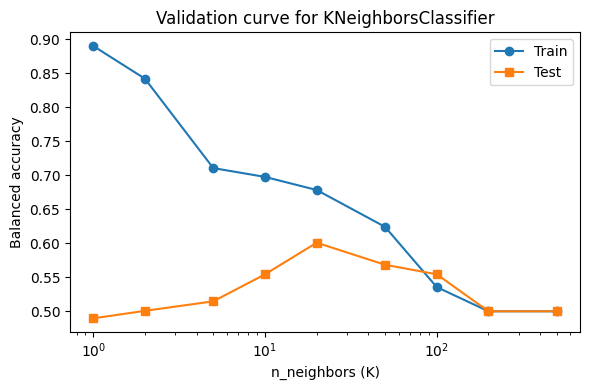

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(param_range, train_scores_mean, marker="o", label="Train")
plt.plot(param_range, test_scores_mean, marker="s", label="Test")
plt.xscale("log")
plt.xlabel("n_neighbors (K)")
plt.ylabel("Balanced accuracy")
plt.title("Validation curve for KNeighborsClassifier")
plt.legend()
plt.tight_layout()
plt.show()


<div class="alert alert-info">

## Question 7

For each of the parameter ranges 1-10, 10-100 and 100-500, answer the following:

***
1. Does the model underfit in this parameter range?
2. Does the model overfit in this parameter range?
3. Does the model best generalize in this parameter range?


In [ ]:
# From 10 to 100 we got the best model in this parameters;
#from 1 to 10 under fitting and then its overfitting after 100

# Wrap up

Overfitting is caused by the limited size of the training set, the noise in the data, and the high flexibility of common machine learning models.

Underfitting happens when the learnt prediction functions suffer from systematic errors. This can be caused by a choice of model family and parameters, which leads to a lack of flexibility to capture the repeatable structure of the true data generating process.

For a fixed training set, the objective is to minimize the test error by adjusting the model family and its parameters to find the best trade-off between overfitting for underfitting.

For a given choice of model family and parameters, increasing the training set size will decrease overfitting but can also cause an increase of underfitting.

The test error of a model that is neither overfitting nor underfitting can still be high if the variations of the target variable cannot be fully determined by the input features. This irreducible error is caused by what we sometimes call label noise. In practice, this often happens when we do not have access to important features for one reason or another.
